In [380]:
import pandas as pd
pd.options.mode.chained_assignment = None

heart_data = pd.read_csv('heart_disease_missing.csv')

In [381]:
heart_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0


## Q1
### CM1. Pairs Plot

To select the subset of features for Pairs Plot, we will use the correlations to find out what features are highly related with our target and study their patterns.

In [339]:
heart_data.corr()['target'].round(2)

age        -0.20
sex        -0.25
cp          0.49
trestbps   -0.12
chol       -0.08
fbs        -0.01
restecg     0.09
thalach     0.42
exang      -0.45
oldpeak    -0.45
slope       0.42
ca         -0.34
thal       -0.37
target      1.00
Name: target, dtype: float64

Considering the correlation of each feature, we choose the subset of features with |corr| > 0.4, which are 'cp','slope', 'thalach','oldpeak', 'exang'.

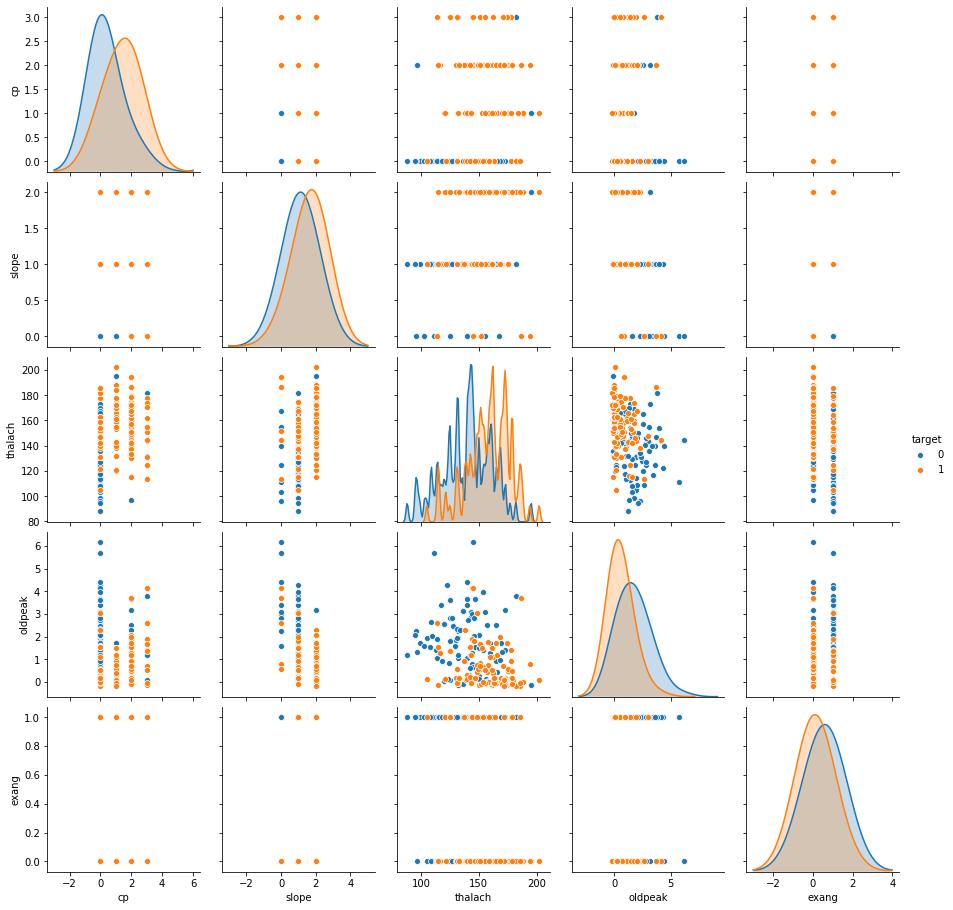

In [340]:
import seaborn as sns
sns.pairplot(data = heart_data,hue='target',vars=['cp','slope', 'thalach','oldpeak','exang'], diag_kws={'bw': 1})

### CM2. Correlation, Mean, Var, Skew, Kurt

In [341]:
import numpy as np
import matplotlib.pyplot as plt

#### Correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text xticklabel objects>)

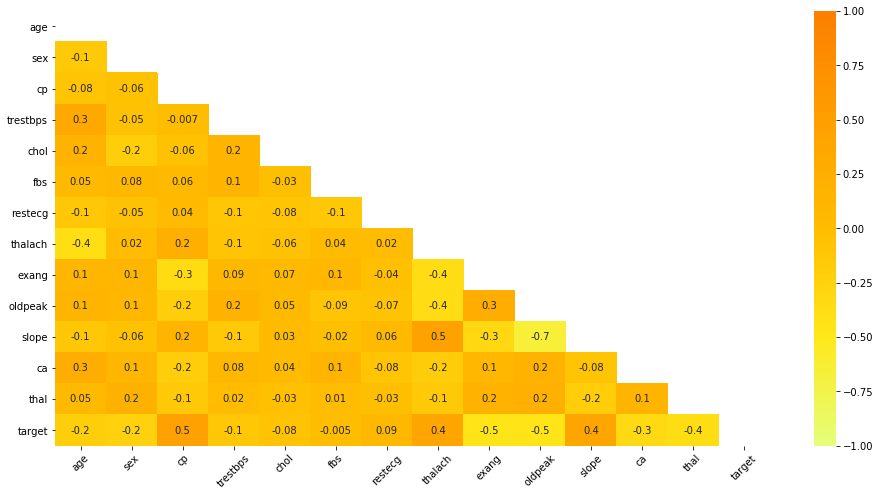

In [45]:
matrix = np.triu(heart_data.corr())
plt.figure(figsize=(16, 8))
sns.heatmap(heart_data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap = 'Wistia', mask=matrix)
plt.xticks(rotation=45)

In [39]:
print(heart_data.corr()['target'].round(2))

age        -0.20
sex        -0.25
cp          0.49
trestbps   -0.12
chol       -0.08
fbs        -0.01
restecg     0.09
thalach     0.42
exang      -0.45
oldpeak    -0.45
slope       0.42
ca         -0.34
thal       -0.37
target      1.00
Name: target, dtype: float64


Taking a look at the correlation matrix above, it's easy to see that 'thalach','oldpeak','thal','ca','cp','slope','exang' have relatively high correlation with the target value(cor > 0.3 || cor < -0.3). So we will choose these features as inputs to the model.

Based on the knowleage, 'age' should have some relation to the target value although the corr is not as high as expected, so we will also put this feature into the following calculation.

#### Mean, Var, Skew, Kurt

In [53]:
stats = heart_data[heart_data['target']==1].describe()
stats.loc['var'] = heart_data[heart_data['target']==1].var().tolist()
stats.loc['skew'] = heart_data[heart_data['target']==1].skew().tolist()
stats.loc['kurt'] = heart_data[heart_data['target']==1].kurtosis().tolist()
print('Heart Disease')
print(stats.loc[['mean','var','skew','kurt'],:].round(1))

Heart Disease
       age  sex   cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
mean  52.7  0.6  1.4     129.9   240.8  0.1      0.6    158.1    0.1      0.6   
var   94.4  0.2  0.9     292.0  1914.9  0.1      0.3    352.4    0.1      0.7   
skew   0.2 -0.3 -0.2       0.4     0.3  2.2     -0.2     -0.5    2.0      1.8   
kurt  -0.6 -1.9 -1.0       0.5     0.1  3.0     -1.5      0.2    2.1      3.7   

      slope   ca  thal  target  
mean    1.7  0.4   2.1     1.0  
var     0.3  0.8   0.2     0.0  
skew   -1.4  2.6   0.9     0.0  
kurt    1.1  6.8   1.3     0.0  


In [52]:
stats = heart_data[heart_data['target']==0].describe()
stats.loc['var'] = heart_data[heart_data['target']==0].var().tolist()
stats.loc['skew'] = heart_data[heart_data['target']==0].skew().tolist()
stats.loc['kurt'] = heart_data[heart_data['target']==0].kurtosis().tolist()
print('No Heart Disease')
print(stats.loc[['mean','var','skew','kurt'],:].round(1))

No Heart Disease
       age  sex   cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
mean  56.3  0.8  0.4     134.1   248.1  0.1      0.5    139.8    0.6      1.7   
var   64.6  0.2  0.7     361.3  2441.7  0.1      0.3    467.0    0.2      1.9   
skew  -0.4 -1.6  1.8       0.8     0.3  2.2      0.5     -0.2   -0.3      0.7   
kurt   0.0  0.7  1.8       0.4     0.3  2.8     -0.8     -0.3   -1.9      0.5   

      slope   ca  thal  target  
mean    1.1  1.1   2.6     0.0  
var     0.3  1.2   0.5     0.0  
skew   -0.0  0.6  -1.3     0.0  
kurt   -0.1 -0.7   0.6     0.0  


The scale of each feature column is different and quite varied as well.

1. The mean of thalach with heart disease is 158, which is far higher than healthy people's mean thalach (140). So that means most of the people who suffered from heart disease may have a higher thalach.
2. The mean of cp with Heart Disease is around 1.4, while the mean of cp with Heart Disease is aound 0.4. This means compared to healthy people, people with heart disease always suffer from chest pain.
3. Fasting blood sugar (fbs) is always nearly normally distributed. (Kurtosis around 3)
4. Thalium of people with heart disease is skewed right while it with no heart disease is skewed left.

### CM3. Outliers

For Data Cleaning, we will only deal with the features that have high relationship with the target: 'thalach','oldpeak','thal','ca','cp','slope','exang' and 'age'

Ordinal, Categorical and Binary data don't need to remove outliers. 

We drew the boxplots for 'thalach', 'oldpeak', 'thal' and 'age'. From the boxplots we can see that thalach and oldpeak have outliers
since there are data points outside the wiskers.

We will use the threshold of Q1-1.5IQR and Q3+1.5IQR to detect and remove these outliers.

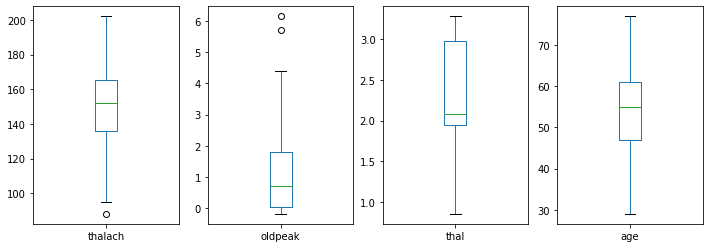

In [342]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
heart_data.boxplot('thalach', grid=False, ax=ax[0])
heart_data.boxplot('oldpeak', grid=False, ax=ax[1])
heart_data.boxplot('thal', grid=False, ax=ax[2])
heart_data.boxplot('age', grid=False, ax=ax[3])

In [382]:
def outlier_detect(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower, upper

In [383]:
lower, upper = outlier_detect(heart_data.thalach)
heart_data = heart_data[(heart_data.thalach>=lower) & (heart_data.thalach<=upper)]

In [384]:
lower, upper = outlier_detect(heart_data.oldpeak)
heart_data = heart_data[(heart_data.oldpeak>=lower) & (heart_data.oldpeak<=upper)]

In [385]:
len(heart_data)

192

20 outliers were removed.

### CM4. Histogram

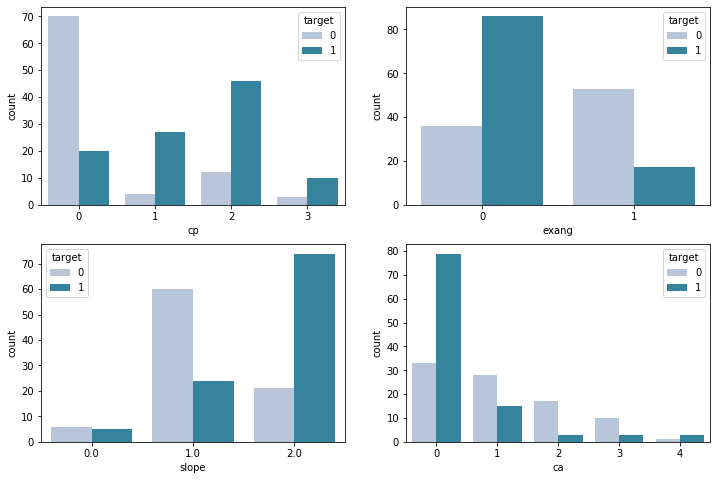

In [347]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.countplot(x='cp',data = heart_data, hue = 'target', palette='PuBuGn')

plt.subplot(2, 2, 2)
sns.countplot(x='exang',data = heart_data, hue = 'target', palette='PuBuGn')

plt.subplot(2, 2, 3)
sns.countplot(x='slope',data = heart_data, hue = 'target', palette='PuBuGn')

plt.subplot(2, 2, 4)
sns.countplot(x='ca',data = heart_data, hue = 'target', palette='PuBuGn')

plt.show()

Text(0.5, 0, 'age')

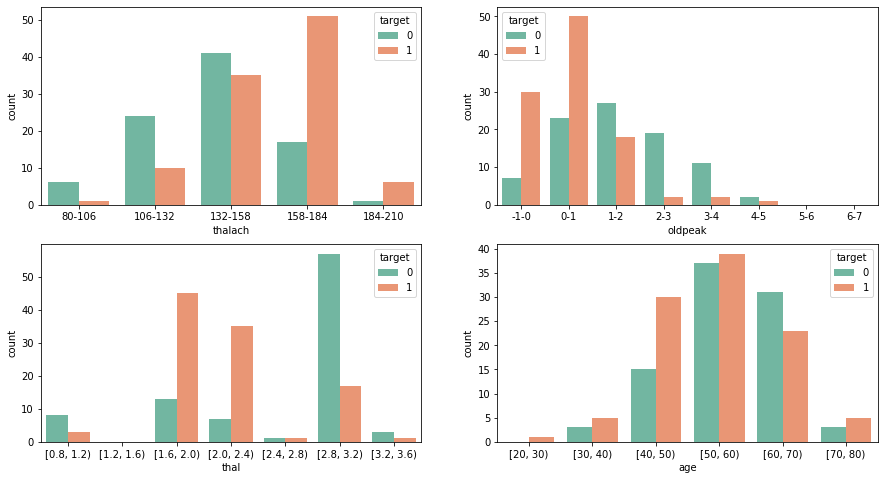

In [348]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
thalach_dist=heart_data[['thalach','target']]
thalach_dist['thalach_range']=pd.cut(thalach_dist['thalach'],bins=[80,106,132,158,184,210],include_lowest=True,right=False,labels=['80-106','106-132','132-158','158-184','184-210'])
sns.countplot(x='thalach_range',hue='target',data=thalach_dist,palette="Set2")
plt.xlabel("thalach")

plt.subplot(2, 2, 2)
oldpeak_dist=heart_data[['oldpeak','target']]
oldpeak_dist['oldpeak_range']=pd.cut(oldpeak_dist['oldpeak'],bins=[-1,0,1,2,3,4,5,6,7],include_lowest=True,right=False,labels=['-1-0','0-1','1-2','2-3','3-4','4-5','5-6','6-7'])
sns.countplot(x='oldpeak_range',hue='target',data=oldpeak_dist,palette="Set2")
plt.xlabel("oldpeak")

plt.subplot(2, 2, 3)
thal_dist=heart_data[['thal','target']]
thal_dist['thal_range']=pd.cut(thal_dist['thal'],bins=[0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6],include_lowest=True,right=False)
sns.countplot(x='thal_range',hue='target',data=thal_dist,palette="Set2")
plt.xlabel("thal")

plt.subplot(2, 2, 4)
age_dist=heart_data[['age','target']]
age_dist['age_range']=pd.cut(age_dist['age'],bins=[20,30,40,50,60,70,80],include_lowest=True,right=False)
sns.countplot(x='age_range',hue='target',data=age_dist,palette="Set2")
plt.xlabel("age")

### CM5. Data Clearning
#### Missing Value

In [386]:
# get the features highly related with target
heart_feat = heart_data[['thalach','oldpeak','thal','ca','cp','slope','exang','target','age']]

In [387]:
heart_feat.isna().sum()

thalach    0
oldpeak    0
thal       1
ca         0
cp         0
slope      2
exang      0
target     0
age        0
dtype: int64

3 missing values were found.

For numeric data, we will impute these missing values with the attribute mean values of their own label (disease of no disease). 

For other data, we will impute these missing values with the attribute median value of their own label (disease of no disease). 

In [388]:
heart_feat[heart_feat.isnull().any(axis=1)]

,thalach,oldpeak,thal,ca,cp,slope,exang,target,age
17,96.833885,1.318529,3.160439,1,2,NaN,0,0,62
26,143.923875,4.141286,2.844006,2,0,NaN,1,0,63
177,115.053919,-0.119541,NaN,0,2,2.0,0,1,53


In [389]:
heart_feat = heart_feat.fillna({'thal':heart_data.thal.mean(),'slope':1})

In [390]:
heart_feat.isna().sum()

thalach    0
oldpeak    0
thal       0
ca         0
cp         0
slope      0
exang      0
target     0
age        0
dtype: int64

3 missing values were dealt with using imputation.

#### Smoothing

We only need to consider noise for numeric data.

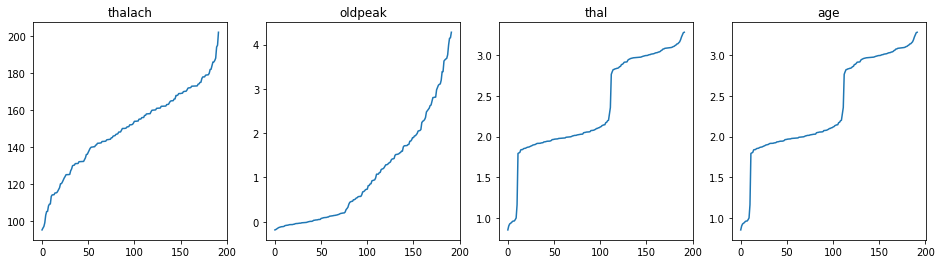

In [354]:
fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.plot(pd.Series(range(192)),heart_feat.thalach.sort_values())
plt.title('thalach')

plt.subplot(1, 4, 2)
plt.plot(pd.Series(range(192)),heart_feat.oldpeak.sort_values())
plt.title('oldpeak')

plt.subplot(1, 4, 3)
plt.plot(pd.Series(range(192)),heart_feat.thal.sort_values())
plt.title('thal')

plt.subplot(1, 4, 4)
plt.plot(pd.Series(range(192)),heart_feat.thal.sort_values())
plt.title('age')

plt.show()

From the line charts we can see that the features don't show obvious fluctuations, the line charts are quite smooth already, so we don't need to use smoothing techniques to remove noise. 


## Q2
### CM6. Basic Model

In [355]:
heart = heart_feat

#### One hot encoding

we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. 

In [356]:
cp_dum = pd.get_dummies(heart['cp'], prefix = "cp")
exang_dum = pd.get_dummies(heart['exang'], prefix = "exang")
slope_dum = pd.get_dummies(heart['slope'], prefix = "slope")
ca_dum = pd.get_dummies(heart['ca'], prefix = "ca")


heart = pd.concat([heart,cp_dum,exang_dum,slope_dum,ca_dum], axis = 1)
heart = heart.drop(columns = ['cp', 'slope','ca','exang'])
heart.head(3)

,thalach,oldpeak,thal,target,age,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0.0,slope_1.0,slope_2.0,ca_0,ca_1,ca_2,ca_3,ca_4
0,115.952071,1.284822,2.175904,1,76,0,0,1,0,1,0,0,1,0,1,0,0,0,0
1,135.970028,3.110483,3.082071,0,43,1,0,0,0,0,1,0,1,0,1,0,0,0,0
2,152.210039,-0.023723,2.020827,0,47,0,0,1,0,1,0,0,0,1,1,0,0,0,0


#### Dividing

In [357]:
from sklearn import model_selection

In [358]:
X = heart[['cp_0','cp_1','cp_2','cp_3','slope_0.0', 'slope_1.0','slope_2.0','ca_0','ca_1','ca_2','ca_3','ca_4','exang_0','exang_1','thalach', 'oldpeak','thal','age']]
y = heart['target']

X_train, X_test_val, y_train, y_test_val = model_selection.train_test_split(X, y, train_size=0.6, random_state=275)
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test_val, y_test_val, train_size=0.5, random_state=275)

In [359]:
print(len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val))
# train, test, validation: 60%, 20%, 20%

115 38 39 115 38 39


#### Training with default parameters

In [392]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [361]:
model_def = KNeighborsClassifier()
model_def.fit(X_train, y_train)

y_pred = model_def.predict(X_test)
acc_def = metrics.accuracy_score(y_test, y_pred).round(2)
print(acc_def)

0.58


#### Finding the best parameter (k)

In [393]:
import matplotlib.pyplot as plt

In [363]:
k_list = [1,5,10,15,20,25,30,35] 
acc_list = []

for k in k_list:

    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train) # fit the model using the train set
    y_pred = model.predict(X_val) # test the model with the validation set
    acc = metrics.accuracy_score(y_val, y_pred)
    acc_list.append(acc)

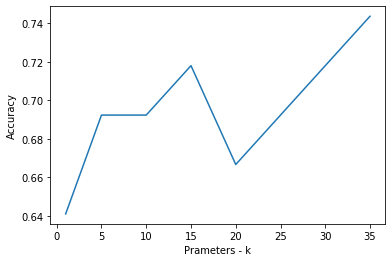

In [364]:
plt.plot(k_list, acc_list)
plt.ylabel('Accuracy')
plt.xlabel('Prameters - k')
plt.show()

In [365]:
print(pd.DataFrame(data={'Accuracy':acc_list, 'Parameters-k':k_list}))

   Accuracy  Parameters-k
0  0.641026             1
1  0.692308             5
2  0.692308            10
3  0.717949            15
4  0.666667            20
5  0.692308            25
6  0.717949            30
7  0.743590            35


k=35 is our best parameter.

### CM7. Improving Performance

In [366]:
model_35 = KNeighborsClassifier(n_neighbors = 35)
model_35.fit(X_train, y_train)
y_pred = model_35.predict(X_test) 

In [367]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.37      0.58      0.45        12
           1       0.74      0.54      0.62        26

    accuracy                           0.55        38
   macro avg       0.55      0.56      0.54        38
weighted avg       0.62      0.55      0.57        38



In [368]:
print("AUC score:", metrics.roc_auc_score(pd.get_dummies(y_test),pd.get_dummies(y_pred)).round(2))

AUC score: 0.56


#### Normalization

In [394]:
from sklearn import preprocessing

In [395]:
# StandardScaler

Scaler = preprocessing.StandardScaler()
Scaler.fit(X_train)

X_scale_val = Scaler.transform(X_val)
X_scale_train = Scaler.transform(X_train)

#### Weighted KNN

We will be comparing the performance of Weighted KNN with weighting shceme being manhatten or eculidean (= default)

We will be comparing the combination of different weighting schema and also k, together, on validation set, to reach the best performance for classfication.

In [396]:
def knn(X_train, y_train, X_val, y_val, k, ws):
    model = KNeighborsClassifier(k, weights='distance', p=ws)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) 

    acc = metrics.accuracy_score(y_val, y_pred).round(3)
    return acc

In [397]:
ws_list = [1,2]
acc_list =[]
k_new = []
ws_new=[]
    
for k in k_list:
    for ws in ws_list:
        acc = knn(X_train, y_train, X_val, y_val, k, ws)
        acc_list.append(acc)
        k_new.append(k)
        ws_new.append(ws)
    
scorecard = pd.DataFrame(data={'Accuracy':acc_list, 'Parameters-k':k_new, 'Weighting Schema':ws_new})
    
print(scorecard)    

    Accuracy  Parameters-k  Weighting Schema
0      0.744             1                 1
1      0.641             1                 2
2      0.692             5                 1
3      0.692             5                 2
4      0.718            10                 1
5      0.718            10                 2
6      0.821            15                 1
7      0.692            15                 2
8      0.821            20                 1
9      0.692            20                 2
10     0.795            25                 1
11     0.692            25                 2
12     0.821            30                 1
13     0.718            30                 2
14     0.795            35                 1
15     0.718            35                 2


Which combination to use?

Many combinations reached the best accuracy (79.5%) on validation set, shown as above. 

To reduce the risk of overfitting and underfitting, we don't want the model to be too complex or too simple, so we chose k = 10 and weighting schema = Euclidean as the best model.

#### Performance on test set

In [398]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(X_train)

X_scale_test = Scaler.transform(X_test)
X_scale_train = Scaler.transform(X_train)

In [399]:
model = KNeighborsClassifier(15, weights='distance', p=1)
model.fit(X_scale_train, y_train)
y_pred = model.predict(X_scale_test)

acc = metrics.accuracy_score(y_test, y_pred).round(2)
print('Accuracy:', acc)

Accuracy: 0.82


In [400]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.95      0.77      0.85        26

    accuracy                           0.82        38
   macro avg       0.80      0.84      0.80        38
weighted avg       0.86      0.82      0.82        38



In [401]:
print("AUC score:", metrics.roc_auc_score(pd.get_dummies(y_test),pd.get_dummies(y_pred)).round(2))

AUC score: 0.84


### Output predictions